# Data Exploration and Cleaning :

### Zara Sales Analysis - Data Exploration and Cleaning
This notebook explores the Zara sales dataset to understand customer behavior and clean the data for further analysis.


In [32]:
#Import Libraries

import pandas as pd
import numpy as plt
import matplotlib.pylab as plt
import seaborn as sns


In [98]:
#Load and Inspect the Data
df = pd.read_csv('zara.csv', sep = ";") #read file


In [36]:
#exploration
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [38]:
df.info() #exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [48]:
df.describe() #exploration

,Product ID,Sales Volume,price
count,252.000000,252.000000,252.000000
mean,153370.503968,1823.702381,86.252540
std,26160.444549,697.703748,52.083205
min,110075.000000,529.000000,7.990000
25%,131053.750000,1243.000000,49.900000
50%,151681.500000,1839.500000,79.900000
75%,175669.750000,2398.750000,109.000000
max,199631.000000,2989.000000,439.000000


In [46]:
df.isnull().sum() #checking missing values 

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [42]:
df[df['name'].isnull()] #To check the rows where a specific column has null (missing) value

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN


In [15]:
df[df['description'].isnull()]

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN


In [50]:
#decided the columns to be kept for the analysis
df.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section'],
      dtype='object')

In [19]:
df['currency'].unique() #so i can drop it cuz all prices are in USD

array(['USD'], dtype=object)

In [21]:
df['terms'].unique() #so keep it cuz it can be grouped 

#currnucy was removed cuz only one currency is there when checked the how many currncy is there


array(['jackets', 'shoes', 'sweaters', 'jeans', 't-shirts'], dtype=object)

In [52]:
df.groupby('scraped_at')['Sales Volume'].sum().sort_values(ascending=False).head(10) 

scraped_at
2024-02-19T09:10:35.068338    5562
2024-02-19T09:10:37.484871    5557
2024-02-19T09:10:45.009106    5435
2024-02-19T09:10:32.534246    5394
2024-02-19T09:10:43.379668    5114
2024-02-19T09:10:36.839166    4791
2024-02-19T09:10:39.911179    4759
2024-02-19T09:10:42.593244    4681
2024-02-19T09:10:40.681401    3861
2024-02-19T09:10:31.877971    3857
Name: Sales Volume, dtype: int64

In [102]:
zaradf = df[['Product ID','Product Position','Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'price', 'scraped_at', 'terms', 'section']].copy() #to avoid setting copy warning 


In [104]:
zaradf.head() #to check

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,price,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,19.99,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,169.00,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,129.00,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,129.00,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,139.00,2024-02-19T08:50:08.453847,jackets,MAN


In [58]:
zaradf.duplicated().any() #no duplicate 

False

In [31]:
#now change the column format for scraped_at and extract new time series column, so convert to datetime first then extract what i need.
#enabling time series analysis trend and charts

In [106]:
# Step 1: Convert 'scraped_at' to datetime
zaradf['scraped_at'] = pd.to_datetime(zaradf['scraped_at'])


# Step 2: Now safely extract datetime parts
zaradf['hour'] = zaradf['scraped_at'].dt.hour
zaradf['day'] = zaradf['scraped_at'].dt.day
zaradf['weekday'] = zaradf['scraped_at'].dt.day_name()
zaradf['month'] = zaradf['scraped_at'].dt.month
zaradf['year'] = zaradf['scraped_at'].dt.year


In [119]:
zaradf.head()# to check

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,price,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,19.99,2024-02-19 08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,169.00,2024-02-19 08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,129.00,2024-02-19 08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,129.00,2024-02-19 08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,139.00,2024-02-19 08:50:08.453847,jackets,MAN


In [108]:
zaradf.drop(columns='scraped_at',inplace=True) #drop the scraped colmn no need for now

In [110]:
zaradf.head() #to check

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,price,terms,section,hour,day,weekday,month,year
0,185102,Aisle,No,Clothing,No,2823,19.99,jackets,MAN,8,19,Monday,2,2024
1,188771,Aisle,No,Clothing,No,654,169.00,jackets,MAN,8,19,Monday,2,2024
2,180176,End-cap,Yes,Clothing,Yes,2220,129.00,jackets,MAN,8,19,Monday,2,2024
3,112917,Aisle,Yes,Clothing,Yes,1568,129.00,jackets,MAN,8,19,Monday,2,2024
4,192936,End-cap,No,Clothing,Yes,2942,139.00,jackets,MAN,8,19,Monday,2,2024


In [112]:
zaradf['Product Category'].unique() #so i can delete it cuz we only have one category that is clothing  

array(['Clothing'], dtype=object)

In [127]:
zaradf.drop(columns='Product Category',inplace=True)

In [73]:
zaradf.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,price,terms,section
0,185102,Aisle,No,No,2823,19.99,jackets,MAN
1,188771,Aisle,No,No,654,169.00,jackets,MAN
2,180176,End-cap,Yes,Yes,2220,129.00,jackets,MAN
3,112917,Aisle,Yes,Yes,1568,129.00,jackets,MAN
4,192936,End-cap,No,Yes,2942,139.00,jackets,MAN


In [72]:
zaradf.isnull().any() #verify before visualiation

Product ID      False
Promotion       False
Seasonal        False
Sales Volume    False
price           False
terms           False
section         False
dtype: bool

In [141]:
zaradf.dtypes

Product ID            int64
Product Position     object
Promotion            object
Seasonal             object
Sales Volume          int64
price               float64
terms                object
section              object
dtype: object

In [145]:
#standarize the text in all the columns by capitalizing first letter using for loop/
# str.lower(): converts to lowercase. - str.strip(): removes extra spaces.

for col in zaradf.select_dtypes(include='object'):
    zaradf[col] = zaradf[col].str.strip().str.title()



In [137]:
zaradf.head()

,Product ID,Product Position,Promotion,Seasonal,Sales Volume,price,terms,section
0,185102,Aisle,No,No,2823,19.99,Jackets,Man
1,188771,Aisle,No,No,654,169.00,Jackets,Man
2,180176,End-Cap,Yes,Yes,2220,129.00,Jackets,Man
3,112917,Aisle,Yes,Yes,1568,129.00,Jackets,Man
4,192936,End-Cap,No,Yes,2942,139.00,Jackets,Man


### Price Analysis:

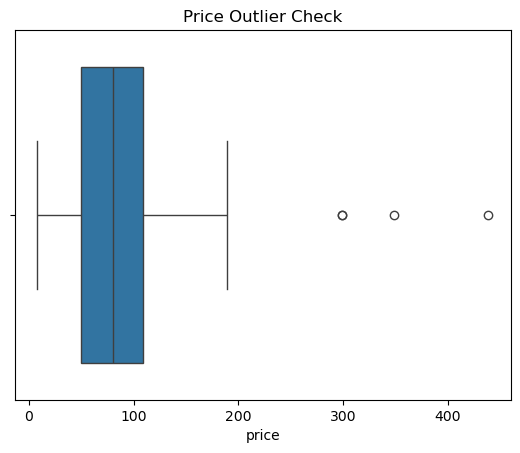

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=zaradf['price'])
plt.title('Price Outlier Check')
plt.show()


In [118]:
df[df['price'] >= 180]
#📌 Conclusion: These are high-end leather/wool jackets, 
#which justifies their price. They’re outliers statistically, but not errors. You can keep them.

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
13,151396,Front of Store,Yes,Clothing,Yes,729,Zara,https://www.zara.com/us/en/cropped-leather-jac...,323134418-800-3,CROPPED LEATHER JACKET,Leather jacket. Cropped length. Lapel collar a...,439.0,USD,2024-02-19T08:50:13.771115,jackets,MAN
22,161909,Aisle,Yes,Clothing,No,1290,Zara,https://www.zara.com/us/en/leather-jacket-p054...,315529534-705-3,LEATHER JACKET,Relaxed fit jacket in leather. Spread collar a...,299.0,USD,2024-02-19T08:50:18.813979,jackets,MAN
38,114877,Aisle,No,Clothing,No,1860,Zara,https://www.zara.com/us/en/suede-jacket-p02521...,323134415-700-3,SUEDE JACKET,Jacket made of suede. Cropped length. Lapel co...,349.0,USD,2024-02-19T08:50:29.497634,jackets,MAN
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN
67,154016,End-cap,Yes,Clothing,Yes,2366,Zara,https://www.zara.com/us/en/wool-blend-textured...,328244979-064-48,WOOL BLEND TEXTURED JACKET,Jacket made of wool blend fabric. Pointed lape...,189.0,USD,2024-02-19T08:50:48.692260,jackets,MAN


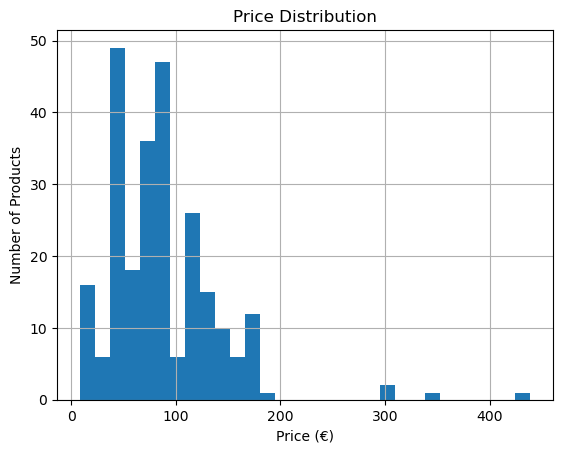

In [124]:
#3. Price Distribution (Histogram)

zaradf['price'].hist(bins=30)
plt.title('Price Distribution')
plt.xlabel('Price (€)')
plt.ylabel('Number of Products')
plt.show()


### Product Position Impact

In [126]:
#4. Sales by Product Position

df.groupby('Product Position')['Sales Volume'].mean().sort_values(ascending=False)
#This tells you:
#“Which product positions lead to higher average sales?” i can include this in my EDA (Exploratory Data Analysis)

Product Position
Front of Store    1873.144928
Aisle             1828.824742
End-cap           1778.255814
Name: Sales Volume, dtype: float64

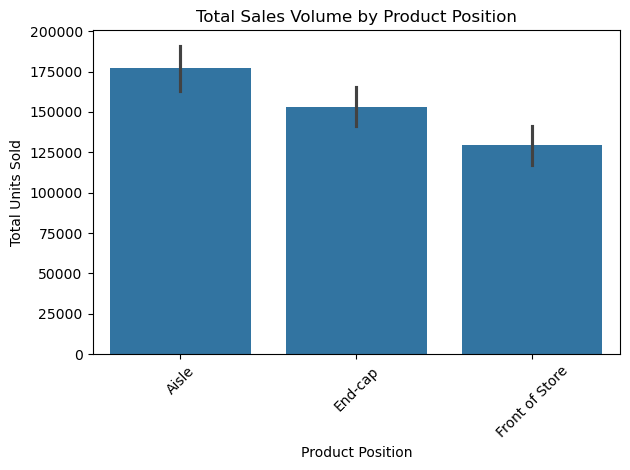

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Product Position', y='Sales Volume', data=df, estimator='sum')
plt.title('Total Sales Volume by Product Position')
plt.ylabel('Total Units Sold')
plt.xlabel('Product Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [130]:
df.groupby('Product Position')['Sales Volume'].sum().sort_values(ascending=False)
#This shows total units sold per position.

Product Position
Aisle             177396
End-cap           152930
Front of Store    129247
Name: Sales Volume, dtype: int64

### Sales Performance Analysis

#### Feature Engineering

In [163]:
zaradf['Revenue']= zaradf['Price']*zaradf['Sales volume'] #creating new columns

In [157]:
# 1. Top Products by Sales Volume

zaradf.groupby('Terms')['Sales volume'].sum().sort_values(ascending=False).head()

Terms
Jackets     259468
Sweaters     75242
Shoes        57906
T-Shirts     53637
Jeans        13320
Name: Sales volume, dtype: int64

In [155]:
## Capitalize the first letter of each column name for consistancy 
zaradf.columns = [col.capitalize() for col in zaradf.columns]
zaradf.columns

Index(['Product id', 'Product position', 'Promotion', 'Product category',
       'Seasonal', 'Sales volume', 'Price', 'Terms', 'Section', 'Hour', 'Day',
       'Weekday', 'Month', 'Year', 'Revenue'],
      dtype='object')

In [153]:
# 2. Top Products by Revenue
zaradf.groupby('Terms')['Revenue'].sum().sort_values(ascending=False).head()


Terms
Jackets     26581815.87
Sweaters     4090631.48
Shoes        3754837.63
T-Shirts     3696806.25
Jeans         864385.25
Name: Revenue, dtype: float64

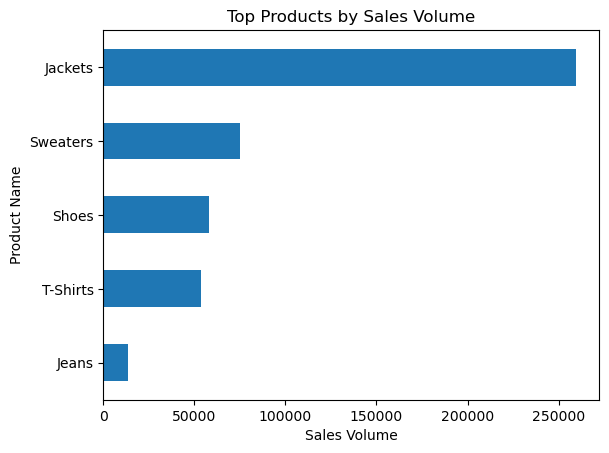

In [151]:
#2. Top Products by Sales Volume (Bar Plot)

top_products = zaradf.groupby('Terms')['Sales volume'].sum().sort_values(ascending=False).head()

top_products.plot(kind='barh')
plt.title('Top Products by Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()


### Season Impact

In [159]:
#lets check the relationship between the jacket and the season 
#Does a certain product type (like jackets) sell more in certain seasons? 
zaradf.groupby(['Seasonal', 'Terms'])['Sales volume'].sum().unstack()


Terms,Jackets,Jeans,Shoes,Sweaters,T-Shirts
Seasonal,,,,,
No,124147,9672,39803,20270,32500
Yes,135321,3648,18103,54972,21137


In [110]:
""✅ Summary: Season-dependent products: Jackets & Sweaters → show strong increase in seasonal periods.
All-season products: T-shirts, Shoes, Jeans → sold more outside of seasonal campaigns."" #help in determining the seasonal items 

SyntaxError: invalid character '✅' (U+2705) (1021644785.py, line 1)

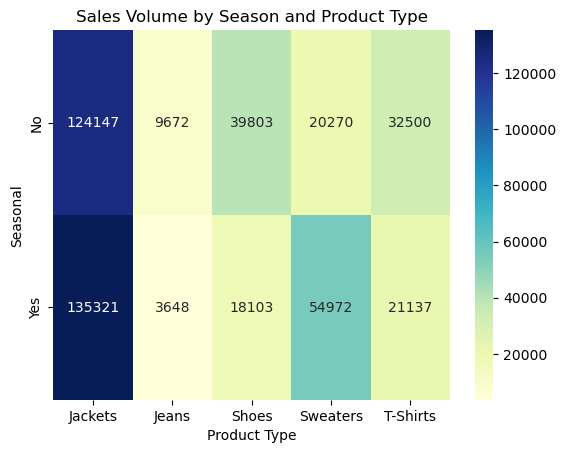

In [158]:
#visiualize the season and the product type

#📌 Goal: See how seasonal sales vary by product type (e.g., sweaters, jackets)

import seaborn as sns
import matplotlib.pyplot as plt

pivot = zaradf.pivot_table(values='Sales volume', index='Seasonal', columns='Terms', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Sales Volume by Season and Product Type')
plt.ylabel('Seasonal')
plt.xlabel('Product Type')
plt.show()


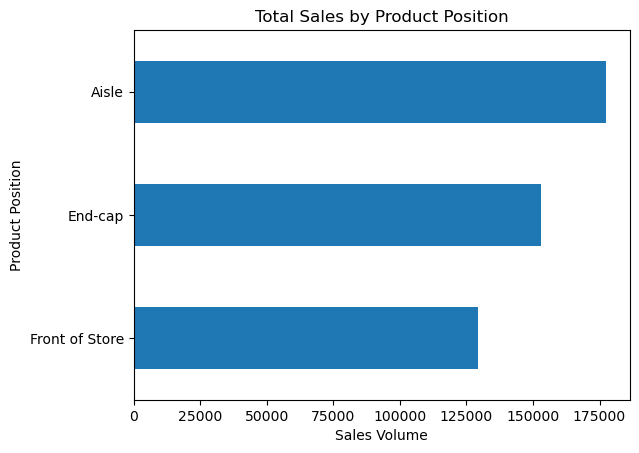

In [178]:
#✅ 4. Total Sales by Product Position (Bar Chart)
position_sales = df.groupby('Product Position')['Sales Volume'].sum().sort_values()#used df cuz product position dont exsit in the zaradf 

position_sales.plot(kind='barh')
plt.title('Total Sales by Product Position')
plt.xlabel('Sales Volume')
plt.ylabel('Product Position')
plt.show()


### Promotion Impact
###### Goal: Find out if promoting products leads to higher revenue.



In [167]:
#is the promotion has impact on the revenue
zaradf.groupby('Promotion')['Revenue'].mean() # yes it has 

Promotion
No     143894.618030
Yes    166619.890833
Name: Revenue, dtype: float64

### Weekday Revenue Trends
#### Goal: Identify which day of the week generates the most revenue.

In [169]:
zaradf.groupby('Weekday')['Revenue'].sum()


Weekday
Monday    38988476.48
Name: Revenue, dtype: float64

In [ ]:
#Time features were excluded due to lack of variation in the source data, 
#making trend analysis unfeasible.” #you can drop them all

## Save the file for power bi

In [171]:
# Round the values to 2 decimal places
zaradf['Price'] = zaradf['Price'].round(2)
zaradf['Revenue'] = zaradf['Revenue'].round(2)


In [165]:
zaradf.head()

,Product id,Product position,Promotion,Seasonal,Sales volume,Price,Terms,Section,Revenue
0,185102,Aisle,No,No,2823,19.99,Jackets,Man,56431.77
1,188771,Aisle,No,No,654,169.00,Jackets,Man,110526.00
2,180176,End-Cap,Yes,Yes,2220,129.00,Jackets,Man,286380.00
3,112917,Aisle,Yes,Yes,1568,129.00,Jackets,Man,202272.00
4,192936,End-Cap,No,Yes,2942,139.00,Jackets,Man,408938.00


In [167]:
#zaradf.to_csv("zara_sales_cleaned.csv", index=False)
#save it in certain folder
zaradf.to_csv("/Users/amalaltlb/Downloads/Zara Sales Analysis/zara_cleaned.csv", index=False)

